# Intermediate Data Creation: Notes and examples

1. BARPA:
    1. Monthly Maximums
    2. Locational Time Series
2. ERA5:
    1. Monthly Maximums


In [3]:
## Put us in the right repo for local relative pathing
import os, importlib, timeit
import matplotlib.pyplot as plt
import xarray as xr
__repo__="/g/data/en0/jwg574/repos/simple_fire_metric/"
os.chdir(__repo__)
import fio,plotting

## 1A BARPA: Monthly Maximums

1. Read year of data (22GB x n_variables (5 + 4 created))
2. loop over months
    1. Calculate maximum 'metric'
    2. Find indices of components used in that metric
    3. store metric, and components
3. Save yearly file

### Scripted data creation on GADI
- Script used to create yearly files:
- Script which sends the creation script to QSUB to be run
Example:
```
bash make_all_barpa_monthly.sh
```
    - The code will spawn a set of jobs that produce yearly files of monthly maximums for BARPA datasets
    - edit the script to run different models/experiments etc.

In [16]:
importlib.reload(fio)
args_test = {'gcm':"ACCESS-CM2", 'experiment':"ssp370", 'realisation':"r4i1p1f1"}

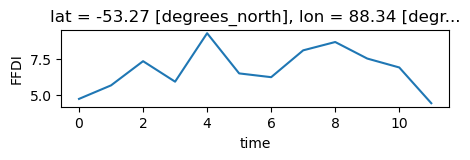

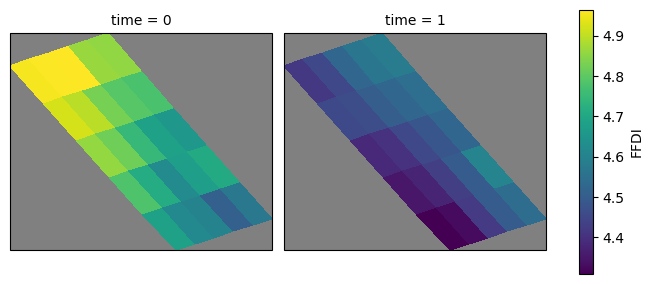

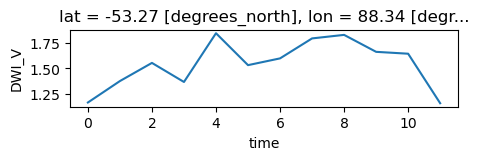

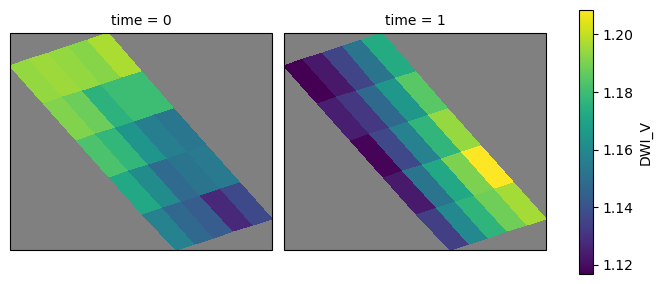

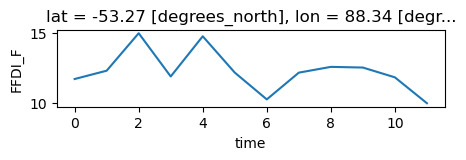

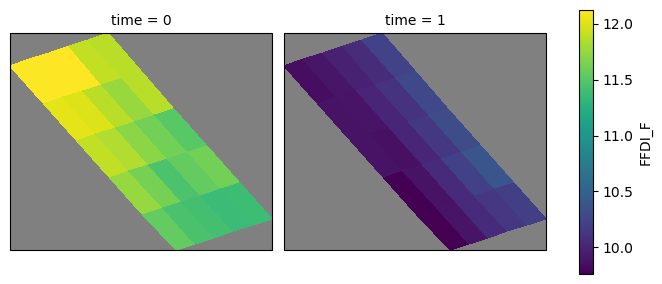

In [32]:
ds = barpa_test
lats=barpa_test.lat.values
lons=barpa_test.lon.values
for dvar in ['FFDI','DWI_V','FFDI_F']:
    # random time series
    midlat,midlon = len(lats)//2, len(lons)//2
    ds[dvar].isel(lat=midlat).isel(lon=midlon).plot.line(x='time',figsize=[5,1])
    plt.show()
    # show single time slice image
    plotting.plot_quick(ds[dvar],itimes = [0,-1])
    plt.show()

In [ ]:
barpa_test = fio.BARPA_read_intermediate_years(ystr='2030',**args_test)

In [ ]:
barpa_test

In [9]:
importlib.reload(fio)

### after making CMCC 2015-2020 intermediates:
## make_all_BARPA_monthlymax.sh runs subscripts/make_BARPA_monthly_max which calls 
## fio.make_BARPA_monthly_maximum_intermediate for a set of years.
## I have a helper function to read the intermediate files

# dictionary of args for convenience
args1 = {'gcm':"CMCC-ESM2", 'experiment':"historical", 'realisation':"r1i1p1f1",}
args2 = {'gcm':"CMCC-ESM2", 'experiment':"ssp370", 'realisation':"r1i1p1f1",}

barpa_1960 = fio.BARPA_read_intermediate_years(ystr="1960", **args1)
barpa_ssp370 = fio.BARPA_read_intermediate_years(ystr="*", **args2)

INFO: Reading 1 BARPA dailymax files matching year 1960
0.3.0


In [11]:
ds_barpa_1960

<xarray.Dataset>
Dimensions:     (lat: 436, lon: 777, time: 12)
Coordinates:
  * lat         (lat) float64 -53.58 -53.42 -53.27 -53.11 ... 13.32 13.48 13.63
  * lon         (lon) float64 88.04 88.19 88.34 88.5 ... 207.5 207.6 207.8 207.9
Dimensions without coordinates: time
Data variables:
    DWI_V_tas   (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    DWI_V_s10   (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    DWI_V_Td    (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    DWI_V       (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI_tas    (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI_s10    (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI        (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI_F_tas  (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI_F_s10  (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI_F_Td   (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>
    FFDI_F      (time, lat, lon) float64 dask.array<chunksize=(12, 436, 777), meta=np.ndarray>

In [12]:
lons = ds_barpa_1960.lon
lats = ds_barpa_1960.lat

In [ ]:
ds = ds_barpa_1960
for dvar in ds.data_vars:
    # random time series
    midlat,midlon = len(lats)//2, len(lons)//2
    ds[dvar].isel(lat=midlat).isel(lon=midlon).plot.line(x='time',figsize=[5,1])
    plt.show()
    # show single time slice image
    plotting.plot_quick(ds[dvar],itimes = [0,-1])
    

# 2: ERA5 Intermediate data
- __ERA5__:
    - ECMWF Reanalysis product, global product ~1960 onwards
    - project: rt52
    - directory: /g/data/rt52/era5/single-levels/reanalysis/
    - size: ~12GB for 2020, x37 levels for multiple level datasets
    - resolution: 0.25 degree resolution in netcdf files
    - 774 netcdf month files per variable
 
- __Intermediate Data__:
    - /scratch/en0/jwg574/ERA5/monthly_maximums/...
    - monthly maximums (saved to yearly files)
        - FFDI, FFDI_F, DWI_V
        - components (same as BARPA monthly files)


In [4]:
importlib.reload(fio)

<module 'fio' from '/g/data/en0/jwg574/repos/simple_fire_metric/fio.py'>

In [63]:
#from fio import ERA5_monthly_max_folder,AU_LATRANGE,AU_LONRANGE,calc_Td,calc_ffdi,calc_ffdi_replacements,calc_monthly_components



In [ ]:
%%time
## Seems to be 5-10 mins per year
fio.make_ERA5_monthly_maximum_intermediate(2015,force_renew=True)

In [5]:
e5_test = fio.ERA5_read_intermediate('2010')

INFO: Reading 1 ERA5 monthly max files matching year 2010
0.3.0


In [6]:
e5 = fio.ERA5_read_intermediate()


INFO: Reading 73 ERA5 monthly max files matching year *


In [7]:
e5

<xarray.Dataset>
Dimensions:     (longitude: 177, latitude: 157, time: 876)
Coordinates:
  * longitude   (longitude) float32 111.0 111.2 111.5 ... 154.5 154.8 155.0
  * latitude    (latitude) float32 -9.0 -9.25 -9.5 -9.75 ... -47.5 -47.75 -48.0
  * time        (time) datetime64[ns] 1950-01-15 1950-02-15 ... 2022-12-15
Data variables:
    DWI_V_t2m   (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    DWI_V_s10   (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    DWI_V_d2m   (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    DWI_V       (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI_t2m    (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI_s10    (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI        (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI_F_t2m  (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI_F_s10  (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI_F_d2m  (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>
    FFDI_F      (time, latitude, longitude) float32 dask.array<chunksize=(12, 157, 177), meta=np.ndarray>

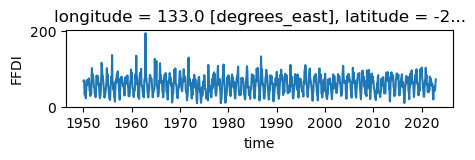

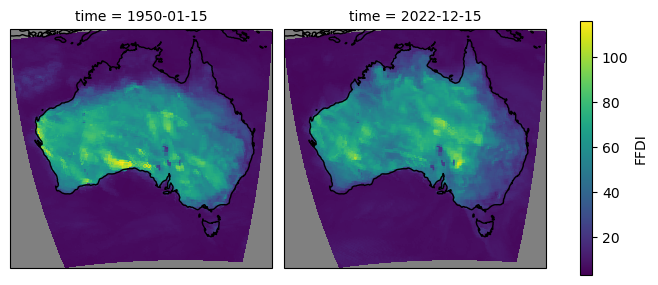

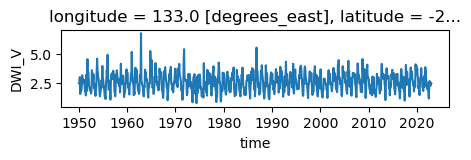

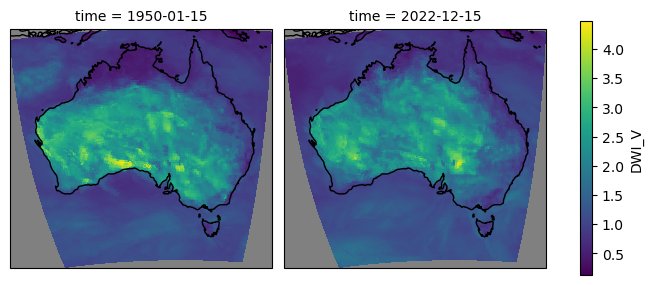

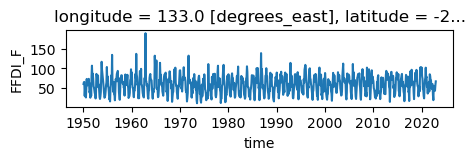

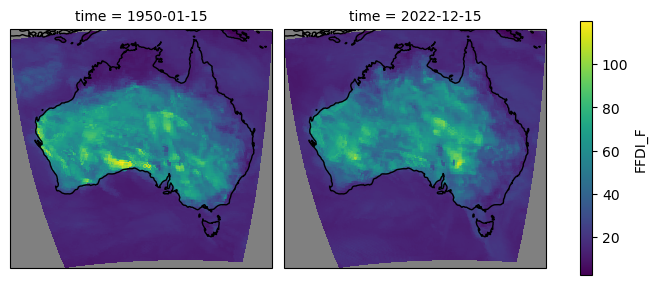

In [9]:
lats,lons=e5.latitude,e5.longitude
ds = e5
for dvar in ['FFDI','DWI_V','FFDI_F']:
    # random time series
    midlat,midlon = len(lats)//2, len(lons)//2
    ds[dvar].isel(latitude=midlat).isel(longitude=midlon).plot.line(x='time',figsize=[5,1])
    plt.show()
    # show single time slice image
    plotting.plot_quick(ds[dvar],itimes = [0,-1])
    plt.show()

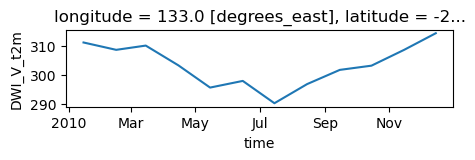

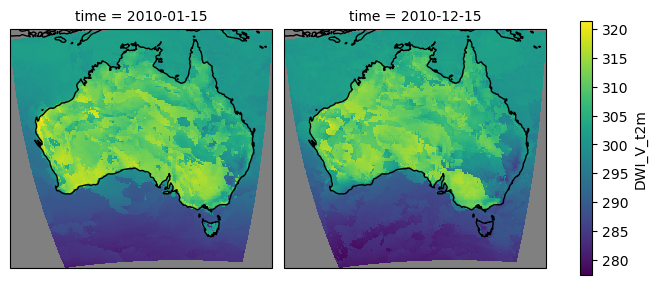

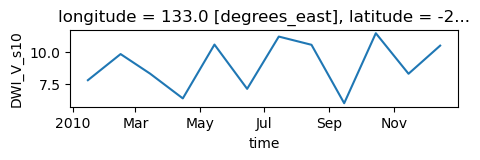

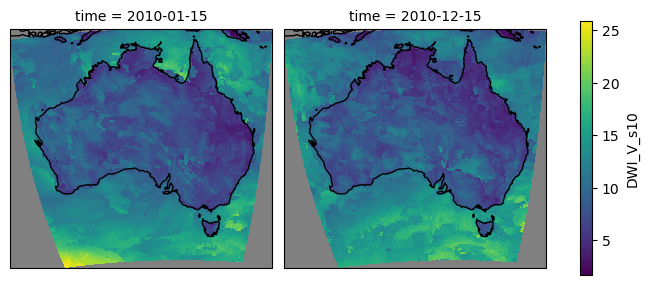

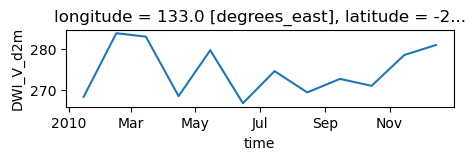

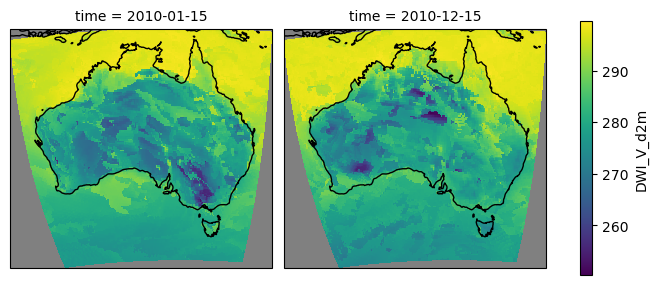

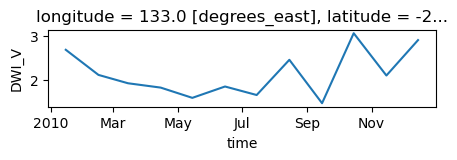

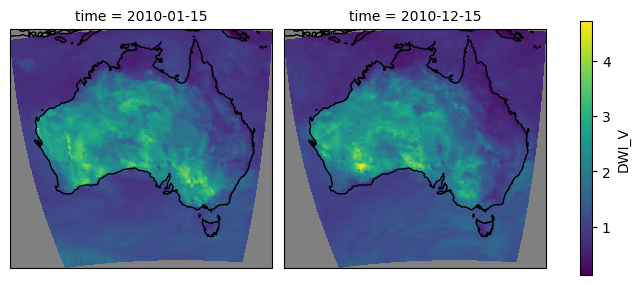

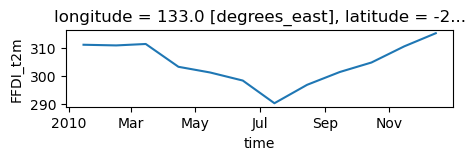

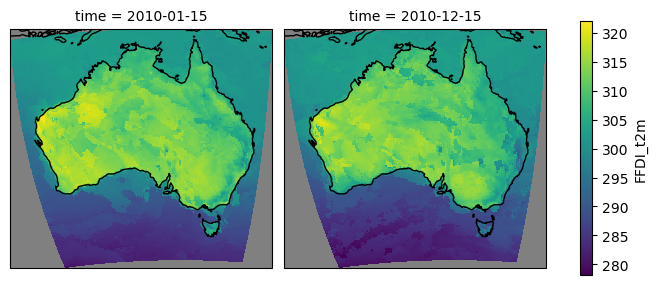

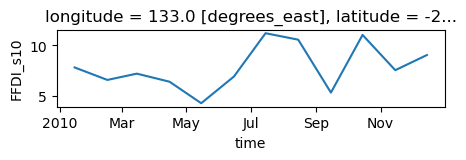

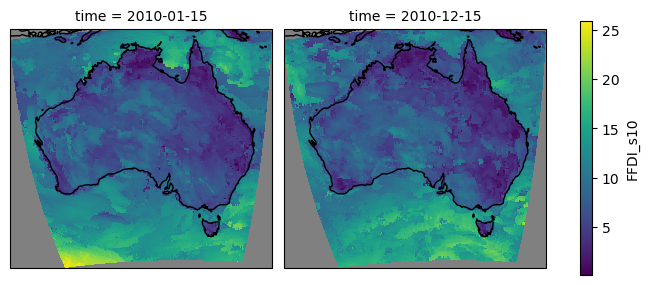

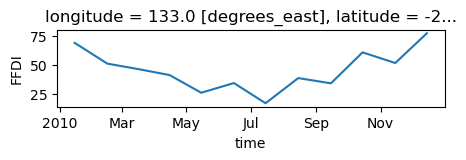

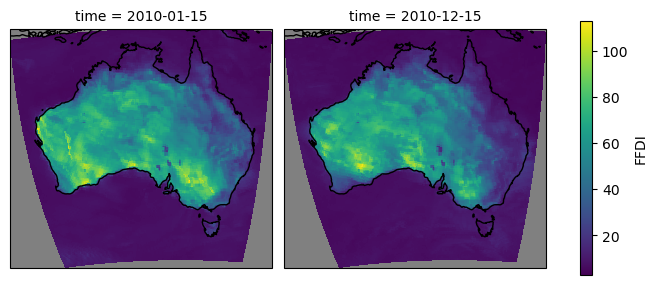

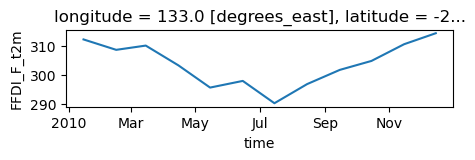

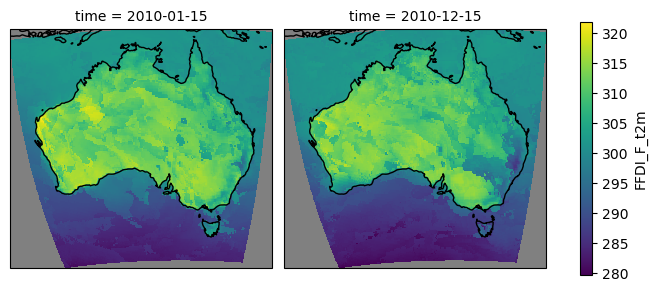

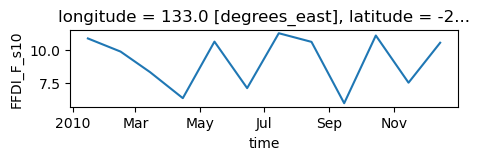

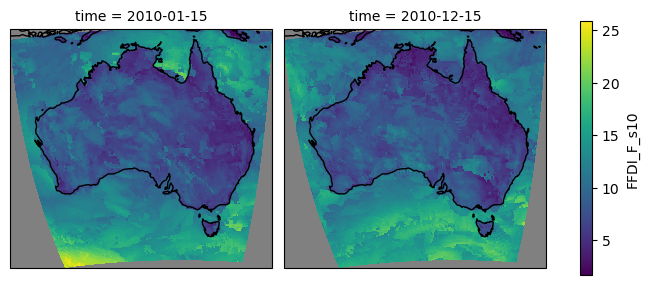

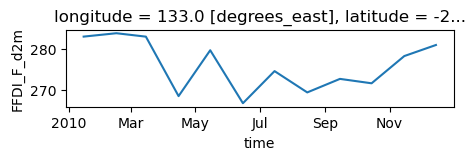

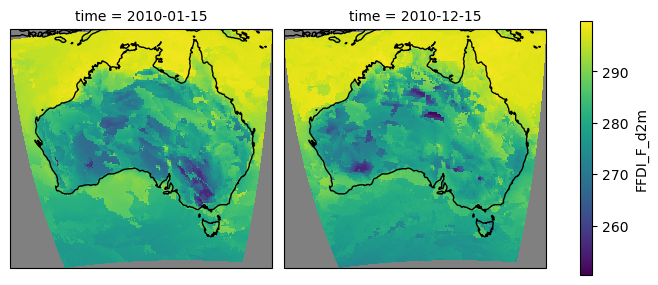

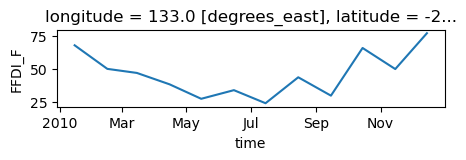

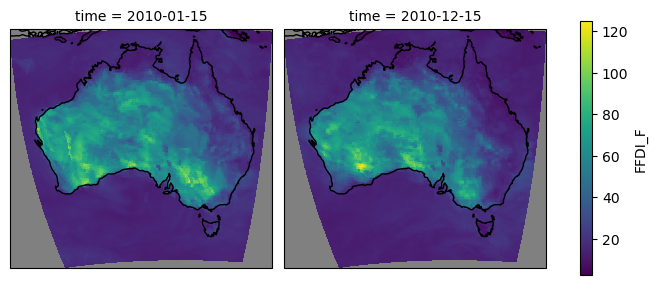

In [8]:
lats,lons=e5_test.latitude,e5_test.longitude
for dvar in e5_test.data_vars:
    # random time series
    midlat,midlon = len(lats)//2, len(lons)//2
    e5_test[dvar].isel(latitude=midlat).isel(longitude=midlon).plot.line(x='time',figsize=[5,1])
    plt.show()
    # show single time slice image
    plotting.plot_quick(e5_test[dvar],itimes = [0,-1])
    plt.show()

# TESTING (these were done while creating some methods in fio)

time label: 2030-01-31 00:00:00    data shape (744, 10, 10)
    max:  (10, 10) [[5.68134958 5.75125271 5.79907399]]
    imax:  (744, 10, 10) <class 'numpy.ndarray'>
    max2:  (10, 10) [[5.68134958 5.75125271 5.79907399]]
        is equal to monthly max? : <xarray.DataArray 'FFDI' ()>
dask.array<all-aggregate, shape=(), dtype=bool, chunksize=(), chunktype=numpy.ndarray>
time label: 2030-02-28 00:00:00    data shape (672, 10, 10)
    max:  (10, 10) [[5.35258643 5.28593206 5.39049383]]
    imax:  (672, 10, 10) <class 'numpy.ndarray'>
    max2:  (10, 10) [[5.35258643 5.28593206 5.39049383]]
        is equal to monthly max? : <xarray.DataArray 'FFDI' ()>
dask.array<all-aggregate, shape=(), dtype=bool, chunksize=(), chunktype=numpy.ndarray>
time label: 2030-03-31 00:00:00    data shape (744, 10, 10)
    max:  (10, 10) [[6.34950387 6.17133374 5.97638316]]
    imax:  (744, 10, 10) <class 'numpy.ndarray'>
    max2:  (10, 10) [[6.34950387 6.17133374 5.97638316]]
        is equal to monthly max?

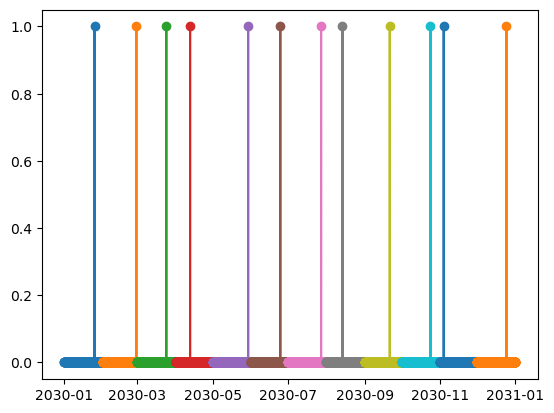

In [17]:
%%time
year=2030
barpa = fio.BARPA_read_year(vars=['hurs','tas','ps','uas','vas'], year=year, *args_barpa)
# calculate FFDI_F, FFDI, DWI_V
barpa = fio.calc_Td(barpa,t='tas',rh='hurs')
barpa = fio.calc_DWI_V(barpa,d2m='Td',t2m='tas',u10='uas',v10='vas')
barpa = fio.calc_ffdi(barpa,d2m='Td',t2m='tas',u10='uas',v10='vas')
monthly = calc_monthly_components(barpa,'FFDI',['tas','s10'])

In [18]:
monthly

<xarray.Dataset>
Dimensions:   (lat: 10, lon: 10, time: 12)
Coordinates:
  * lat       (lat) float64 -53.58 -53.42 -53.27 -53.11 ... -52.49 -52.34 -52.19
  * lon       (lon) float64 88.04 88.19 88.34 88.5 ... 88.96 89.12 89.27 89.43
Dimensions without coordinates: time
Data variables:
    FFDI_tas  (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    FFDI_s10  (time, lat, lon) float64 dask.array<chunksize=(1, 10, 10), meta=np.ndarray>
    FFDI      (time, lat, lon) float64 5.681 5.751 5.799 ... 4.512 4.639 4.562